In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from labellines import labelLine, labelLines

from abstractions import *
import statsmodels.api as sm

In [2]:
def normalized_entropy(responses):
    responses = np.array(responses).T
    entropy = []
    for response in responses:
        counts = np.array([list(response).count(i) for i in set(response)])
        probs = counts/np.sum(counts)
        h = -np.sum(probs*np.log(probs))
        entropy.append(h / np.log(len(response)))
    return entropy

def simple_entropy(responses):
    return [(len(np.unique(responses[:,i])) - 1) / len(responses) for i in range(responses.shape[1])]

def flat_tail(ensemble_responses):
    responses = np.array(ensemble_responses).T
    responses_sampled = np.where(responses == 0, np.arange(len(responses[0]))+2, responses).T
    return responses_sampled

def tapered_tail(ensemble_responses, scale = 1):
    responses = np.array(ensemble_responses).T
    responses_sampled = np.where(responses == 0, np.random.exponential(scale, len(responses[0])).astype(np.int64)+1, responses).T
    return responses_sampled



In [3]:
questions = 10000
agents = 100
thresholds = agents
competence = (1, 1)
confusion_uncertainty_mean = (0.5,0.5)
confusion_uncertainty_covariance = 0.02*np.array([[1,0],[0,1]])

running_vals = []
ensemble_responses_list = []

confusion_uncertainty = np.clip(np.random.multivariate_normal(confusion_uncertainty_mean, confusion_uncertainty_covariance, questions), 0, 1)
exam = Exam(questions, confusions = confusion_uncertainty[:,0], uncertainties = confusion_uncertainty[:,1])
ensemble = Ensemble(n_agents = agents, competencies = np.random.uniform(competence[0], competence[1], agents))
ensemble_responses = ensemble.take_exam(exam)

responses_sampled = flat_tail(ensemble_responses)

entropies = normalized_entropy(responses_sampled)
simple_entropies = simple_entropy(responses_sampled)

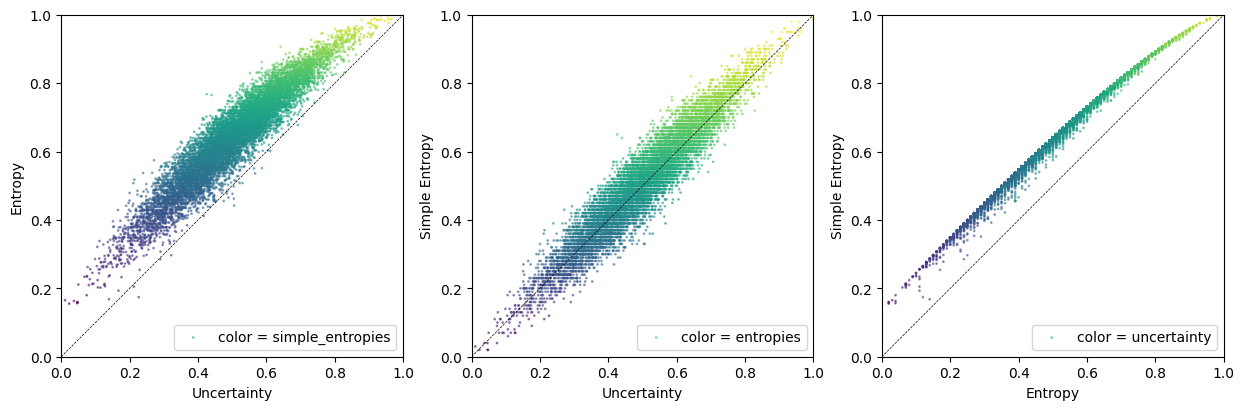

In [4]:
fig, ax = plt.subplots(1,3, figsize = (15,5))

ax[0].scatter(confusion_uncertainty[:,1], entropies, alpha = 0.5, s = 1, c=simple_entropies, label = "color = simple_entropies")
ax[0].set_xlabel("Uncertainty")
ax[0].set_ylabel("Entropy")
ax[0].plot([0,1],[0,1], c = 'k', ls = '--', linewidth = 0.5)
ax[0].legend(loc = 'lower right')

ax[1].scatter(confusion_uncertainty[:,1], simple_entropies, alpha = 0.5, s = 1, c=entropies, label = "color = entropies")
ax[1].set_xlabel("Uncertainty")
ax[1].set_ylabel("Simple Entropy")
ax[1].plot([0,1],[0,1], c = 'k', ls = '--', linewidth = 0.5)
ax[1].legend(loc = 'lower right')

ax[2].scatter(simple_entropies, entropies, alpha = 0.5, s = 1, c=confusion_uncertainty[:,1], label = "color = uncertainty")
ax[2].set_xlabel("Entropy")
ax[2].set_ylabel("Simple Entropy")
ax[2].plot([0,1],[0,1], c = 'k', ls = '--', linewidth = 0.5)
ax[2].legend(loc = 'lower right')

for a in ax:
    a.set_xlim(0,1)
    a.set_ylim(0,1)
    a.set_aspect('equal', 'box')

In [5]:
questions = 100
agents = 1000
thresholds = agents
competence = (1, 1)
confusion_uncertainty_mean = (0.5,0.5)
confusion_uncertainty_covariance = 0.02*np.array([[1,0],[0,1]])

running_vals = []
ensemble_responses_list = []

confusion_uncertainty = np.clip(np.random.multivariate_normal(confusion_uncertainty_mean, confusion_uncertainty_covariance, questions), 0, 1)
exam = Exam(questions, confusions = confusion_uncertainty[:,0], uncertainties = confusion_uncertainty[:,1])
ensemble = Ensemble(n_agents = agents, competencies = np.random.uniform(competence[0], competence[1], agents))
ensemble_responses = ensemble.take_exam(exam)

responses_sampled = flat_tail(ensemble_responses)

entropies = normalized_entropy(responses_sampled)
simple_entropies = simple_entropy(responses_sampled)

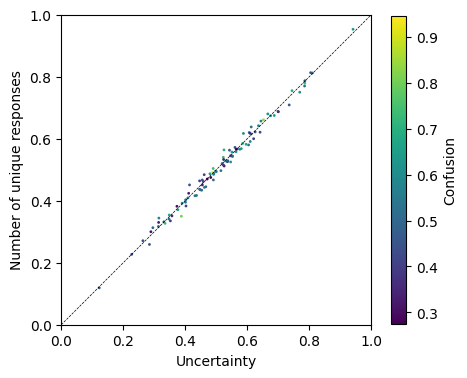

In [6]:
fig, ax = plt.subplots(1,1, figsize = (5,5))

# ax.scatter(confusion_uncertainty[:,1], simple_entropies, alpha = 1, s = 1, color=[1,0.25,0.3])
plot = ax.scatter(confusion_uncertainty[:,1], simple_entropies, alpha = 1, s = 1, c=confusion_uncertainty[:,0])
ax.set_xlabel("Uncertainty")
ax.set_ylabel("Number of unique responses")
ax.plot([0,1],[0,1], c = 'k', ls = '--', linewidth = 0.5)
plt.colorbar(plot, label = "Confusion", shrink=0.8)

ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal', 'box')

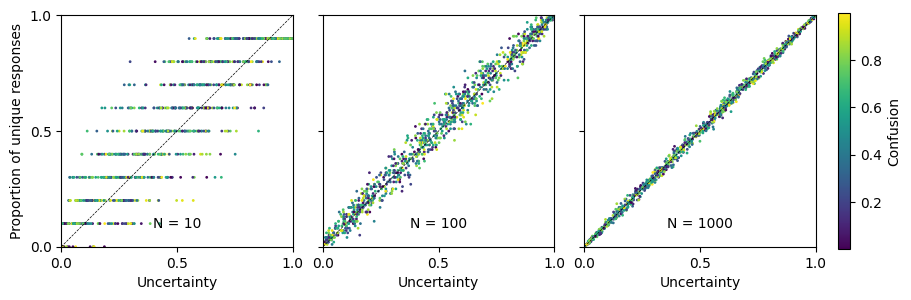

In [7]:
fig, ax = plt.subplots(1,3, figsize = (9,3), sharey = True, constrained_layout = True)

questions = 1000
agents = 10
thresholds = agents
competence = (1, 1)
confusion_uncertainty_mean = (0.5,0.5)
confusion_uncertainty_covariance = 0.02*np.array([[1,0],[0,1]])

running_vals = []
ensemble_responses_list = []

# confusion_uncertainty = np.clip(np.random.multivariate_normal(confusion_uncertainty_mean, confusion_uncertainty_covariance, questions), 0, 1)
confusion_uncertainty = np.random.uniform([0,0],[1,1], [questions,2])
exam = Exam(questions, confusions = confusion_uncertainty[:,0], uncertainties = confusion_uncertainty[:,1])
ensemble = Ensemble(n_agents = agents, competencies = np.random.uniform(competence[0], competence[1], agents))
ensemble_responses = ensemble.take_exam(exam)

responses_sampled = flat_tail(ensemble_responses)

entropies = normalized_entropy(responses_sampled)
simple_entropies = simple_entropy(responses_sampled)

plot = ax[0].scatter(confusion_uncertainty[:,1], simple_entropies, alpha = 1, s = 1, c=confusion_uncertainty[:,0])
ax[0].set_xlabel("Uncertainty")
ax[0].set_ylabel("Proportion of unique responses")
ax[0].plot([0,1],[0,1], c = 'k', ls = '--', linewidth = 0.5)
# plt.colorbar(plot, label = "Confusion", shrink=0.71, ax = ax[0])
ax[0].text(0.5, 0.1, "N = 10", fontsize = 10, ha = 'center', va = 'center', transform = ax[0].transAxes)

questions = 1000
agents = 100
thresholds = agents
competence = (1, 1)
confusion_uncertainty_mean = (0.5,0.5)
confusion_uncertainty_covariance = 0.02*np.array([[1,0],[0,1]])

running_vals = []
ensemble_responses_list = []

# confusion_uncertainty = np.clip(np.random.multivariate_normal(confusion_uncertainty_mean, confusion_uncertainty_covariance, questions), 0, 1)
confusion_uncertainty = np.random.uniform([0,0],[1,1], [questions,2])
exam = Exam(questions, confusions = confusion_uncertainty[:,0], uncertainties = confusion_uncertainty[:,1])
ensemble = Ensemble(n_agents = agents, competencies = np.random.uniform(competence[0], competence[1], agents))
ensemble_responses = ensemble.take_exam(exam)

responses_sampled = flat_tail(ensemble_responses)

entropies = normalized_entropy(responses_sampled)
simple_entropies = simple_entropy(responses_sampled)

plot = ax[1].scatter(confusion_uncertainty[:,1], simple_entropies, alpha = 1, s = 1, c=confusion_uncertainty[:,0])
ax[1].set_xlabel("Uncertainty")
# ax[1].set_ylabel("Proportion of unique responses")
ax[1].plot([0,1],[0,1], c = 'k', ls = '--', linewidth = 0.5)
# plt.colorbar(plot, label = "Confusion", shrink=0.71, ax = ax[1])
ax[1].text(0.5, 0.1, "N = 100", fontsize = 10, ha = 'center', va = 'center', transform = ax[1].transAxes)

questions = 1000
agents = 1000
thresholds = agents
competence = (1, 1)
confusion_uncertainty_mean = (0.5,0.5)
confusion_uncertainty_covariance = 0.02*np.array([[1,0],[0,1]])

running_vals = []
ensemble_responses_list = []

# confusion_uncertainty = np.clip(np.random.multivariate_normal(confusion_uncertainty_mean, confusion_uncertainty_covariance, questions), 0, 1)
confusion_uncertainty = np.random.uniform([0,0],[1,1], [questions,2])
exam = Exam(questions, confusions = confusion_uncertainty[:,0], uncertainties = confusion_uncertainty[:,1])
ensemble = Ensemble(n_agents = agents, competencies = np.random.uniform(competence[0], competence[1], agents))
ensemble_responses = ensemble.take_exam(exam)

responses_sampled = flat_tail(ensemble_responses)

entropies = normalized_entropy(responses_sampled)
simple_entropies = simple_entropy(responses_sampled)

plot = ax[2].scatter(confusion_uncertainty[:,1], simple_entropies, alpha = 1, s = 1, c=confusion_uncertainty[:,0])
ax[2].set_xlabel("Uncertainty")
# ax[2].set_ylabel("Proportion of unique responses")
ax[2].plot([0,1],[0,1], c = 'k', ls = '--', linewidth = 0.5)
plt.colorbar(plot, label = "Confusion", shrink=0.9)
ax[2].text(0.5, 0.1, "N = 1000", fontsize = 10, ha = 'center', va = 'center', transform = ax[2].transAxes)

for a in ax:
    a.set_xlim(0,1)
    a.set_ylim(0,1)
    a.set_xticks([0,0.5,1])
    a.set_yticks([0,0.5,1])
    a.set_aspect('equal', 'box')

plt.savefig("uncertainty_vs_uniqueresponses.pdf", bbox_inches='tight')

(array([[390.,  69.,  72., ...,  64.,  63.,  72.],
        [676.,  32.,  31., ...,  35.,  45.,  35.],
        [322.,  71.,  81., ...,  72.,  75.,  80.],
        ...,
        [754.,  30.,  28., ...,  29.,  36.,  27.],
        [705.,  39.,  38., ...,  32.,  41.,  31.],
        [457.,  52.,  64., ...,  63.,  61.,  60.]]),
 array([-1.000e+00,  9.920e+01,  1.994e+02,  2.996e+02,  3.998e+02,
         5.000e+02,  6.002e+02,  7.004e+02,  8.006e+02,  9.008e+02,
         1.001e+03]),
 <a list of 1000 BarContainer objects>)

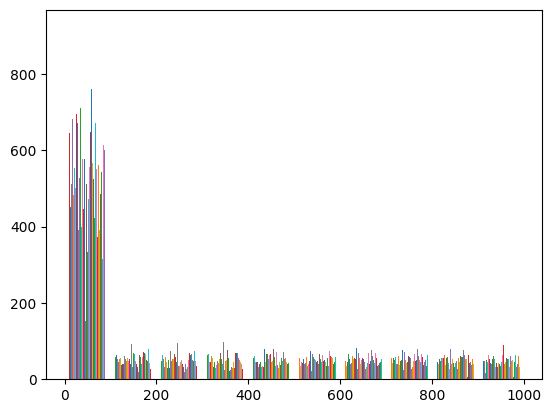

In [159]:
plt.hist(responses_sampled, lw = 0.5)

In [178]:
questions = 1000
agents = 1000
thresholds = agents
competence = (1, 1)
confusion_uncertainty_mean = (0.5,0.5)
confusion_uncertainty_covariance = 0.02*np.array([[1,0],[0,1]])

running_vals = []
ensemble_responses_list = []

confusion_uncertainty = np.clip(np.random.multivariate_normal(confusion_uncertainty_mean, confusion_uncertainty_covariance, questions), 0, 1)
exam = Exam(questions, confusions = confusion_uncertainty[:,0], uncertainties = confusion_uncertainty[:,1])
ensemble = Ensemble(n_agents = agents, competencies = np.random.uniform(competence[0], competence[1], agents))
ensemble_responses = ensemble.take_exam(exam)

responses_sampled = tapered_tail(ensemble_responses, scale = 100)

entropies = normalized_entropy(responses_sampled)
simple_entropies = simple_entropy(responses_sampled)

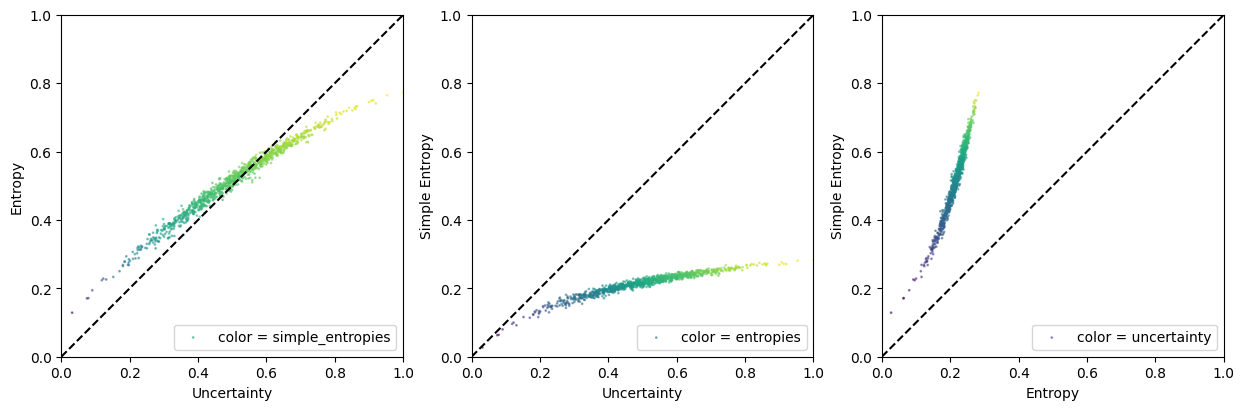

In [179]:
fig, ax = plt.subplots(1,3, figsize = (15,5))

ax[0].scatter(confusion_uncertainty[:,1], entropies, alpha = 0.5, s = 1, c=simple_entropies, label = "color = simple_entropies")
ax[0].set_xlabel("Uncertainty")
ax[0].set_ylabel("Entropy")
ax[0].plot([0,1],[0,1], c = 'k', ls = '--')
ax[0].legend(loc = 'lower right')

ax[1].scatter(confusion_uncertainty[:,1], simple_entropies, alpha = 0.5, s = 1, c=entropies, label = "color = entropies")
ax[1].set_xlabel("Uncertainty")
ax[1].set_ylabel("Simple Entropy")
ax[1].plot([0,1],[0,1], c = 'k', ls = '--')
ax[1].legend(loc = 'lower right')

ax[2].scatter(simple_entropies, entropies, alpha = 0.5, s = 1, c=confusion_uncertainty[:,1], label = "color = uncertainty")
ax[2].set_xlabel("Entropy")
ax[2].set_ylabel("Simple Entropy")
ax[2].plot([0,1],[0,1], c = 'k', ls = '--')
ax[2].legend(loc = 'lower right')

for a in ax:
    a.set_xlim(0,1)
    a.set_ylim(0,1)
    a.set_aspect('equal', 'box')

(array([[866.,  82.,  23., ...,   1.,   2.,   0.],
        [714., 148.,  73., ...,   1.,   1.,   0.],
        [799., 109.,  50., ...,   2.,   1.,   1.],
        ...,
        [768., 131.,  53., ...,   2.,   0.,   0.],
        [819.,  96.,  55., ...,   1.,   1.,   1.],
        [696., 174.,  68., ...,   2.,   2.,   1.]]),
 array([ -1. ,  80.9, 162.8, 244.7, 326.6, 408.5, 490.4, 572.3, 654.2,
        736.1, 818. ]),
 <a list of 1000 BarContainer objects>)

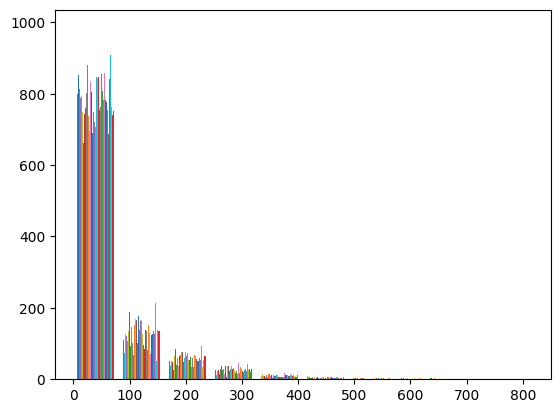

In [180]:
plt.hist(responses_sampled, lw = 0.5)

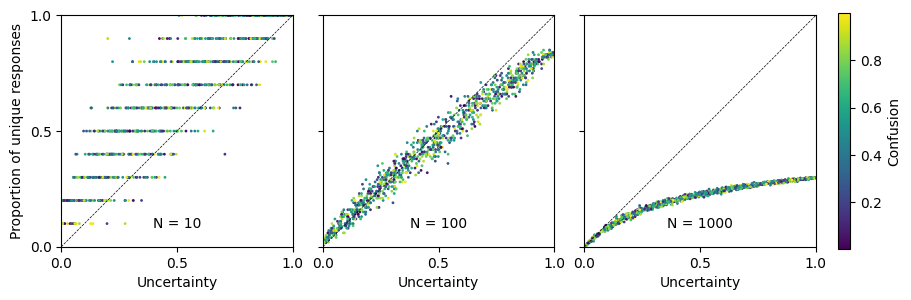

In [4]:
fig, ax = plt.subplots(1,3, figsize = (9,3), sharey = True, constrained_layout = True)

questions = 1000
agents = 10
thresholds = agents
competence = (1, 1)
confusion_uncertainty_mean = (0.5,0.5)
confusion_uncertainty_covariance = 0.02*np.array([[1,0],[0,1]])

running_vals = []
ensemble_responses_list = []

# confusion_uncertainty = np.clip(np.random.multivariate_normal(confusion_uncertainty_mean, confusion_uncertainty_covariance, questions), 0, 1)
confusion_uncertainty = np.random.uniform([0,0],[1,1], [questions,2])
exam = Exam(questions, confusions = confusion_uncertainty[:,0], uncertainties = confusion_uncertainty[:,1])
ensemble = Ensemble(n_agents = agents, competencies = np.random.uniform(competence[0], competence[1], agents))
ensemble_responses = ensemble.take_exam(exam)

responses_sampled = tapered_tail(ensemble_responses, scale=100)

entropies = normalized_entropy(responses_sampled)
simple_entropies = simple_entropy(responses_sampled)

plot = ax[0].scatter(confusion_uncertainty[:,1], simple_entropies, alpha = 1, s = 1, c=confusion_uncertainty[:,0])
ax[0].set_xlabel("Uncertainty")
ax[0].set_ylabel("Proportion of unique responses")
ax[0].plot([0,1],[0,1], c = 'k', ls = '--', linewidth = 0.5)
# plt.colorbar(plot, label = "Confusion", shrink=0.71, ax = ax[0])
ax[0].text(0.5, 0.1, "N = 10", fontsize = 10, ha = 'center', va = 'center', transform = ax[0].transAxes)

questions = 1000
agents = 100
thresholds = agents
competence = (1, 1)
confusion_uncertainty_mean = (0.5,0.5)
confusion_uncertainty_covariance = 0.02*np.array([[1,0],[0,1]])

running_vals = []
ensemble_responses_list = []

# confusion_uncertainty = np.clip(np.random.multivariate_normal(confusion_uncertainty_mean, confusion_uncertainty_covariance, questions), 0, 1)
confusion_uncertainty = np.random.uniform([0,0],[1,1], [questions,2])
exam = Exam(questions, confusions = confusion_uncertainty[:,0], uncertainties = confusion_uncertainty[:,1])
ensemble = Ensemble(n_agents = agents, competencies = np.random.uniform(competence[0], competence[1], agents))
ensemble_responses = ensemble.take_exam(exam)

responses_sampled = tapered_tail(ensemble_responses, scale=100)

entropies = normalized_entropy(responses_sampled)
simple_entropies = simple_entropy(responses_sampled)

plot = ax[1].scatter(confusion_uncertainty[:,1], simple_entropies, alpha = 1, s = 1, c=confusion_uncertainty[:,0])
ax[1].set_xlabel("Uncertainty")
# ax[1].set_ylabel("Proportion of unique responses")
ax[1].plot([0,1],[0,1], c = 'k', ls = '--', linewidth = 0.5)
# plt.colorbar(plot, label = "Confusion", shrink=0.71, ax = ax[1])
ax[1].text(0.5, 0.1, "N = 100", fontsize = 10, ha = 'center', va = 'center', transform = ax[1].transAxes)

questions = 1000
agents = 1000
thresholds = agents
competence = (1, 1)
confusion_uncertainty_mean = (0.5,0.5)
confusion_uncertainty_covariance = 0.02*np.array([[1,0],[0,1]])

running_vals = []
ensemble_responses_list = []

# confusion_uncertainty = np.clip(np.random.multivariate_normal(confusion_uncertainty_mean, confusion_uncertainty_covariance, questions), 0, 1)
confusion_uncertainty = np.random.uniform([0,0],[1,1], [questions,2])
exam = Exam(questions, confusions = confusion_uncertainty[:,0], uncertainties = confusion_uncertainty[:,1])
ensemble = Ensemble(n_agents = agents, competencies = np.random.uniform(competence[0], competence[1], agents))
ensemble_responses = ensemble.take_exam(exam)

responses_sampled = tapered_tail(ensemble_responses, scale=100)

entropies = normalized_entropy(responses_sampled)
simple_entropies = simple_entropy(responses_sampled)

plot = ax[2].scatter(confusion_uncertainty[:,1], simple_entropies, alpha = 1, s = 1, c=confusion_uncertainty[:,0])
ax[2].set_xlabel("Uncertainty")
# ax[2].set_ylabel("Proportion of unique responses")
ax[2].plot([0,1],[0,1], c = 'k', ls = '--', linewidth = 0.5)
plt.colorbar(plot, label = "Confusion", shrink=0.9)
ax[2].text(0.5, 0.1, "N = 1000", fontsize = 10, ha = 'center', va = 'center', transform = ax[2].transAxes)

for a in ax:
    a.set_xlim(0,1)
    a.set_ylim(0,1)
    a.set_xticks([0,0.5,1])
    a.set_yticks([0,0.5,1])
    a.set_aspect('equal', 'box')

# plt.savefig("uncertainty_vs_uniqueresponses.pdf", bbox_inches='tight')